# **CASE STUDY 01 - Preprocessing**
Dataset for loan prediction is given
1. Load the dataset in Python environment  
2. Perform different preprocessing steps
a. Missing value handling
b. Outlier detection
c. Encoding
d. Scaling
3. Give detailed description for each step

## Load the given dataset

In [372]:
import pandas as pd         # Importing pandas library

In [373]:
df = pd.read_csv("/content/train_loan.csv")  # loading dataset

In [374]:
ml_df=df.copy()  # making a copy so that original data is not altered

In [375]:
ml_df.head(10)  # displaying first 10 columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


####For machine learning, we need to drop columns that are irrelevant when training - so dropping column "Loan_ID" as it is unique.

In [376]:
ml_df=ml_df[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [377]:
ml_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [378]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# **PREPROCESSING STEPS**

## Step 1: Check if duplicates are present in the data set

Duplicates are repeated records in a dataset where two or more rows contain the same information.

In [379]:
# Find duplicates
ml_df.duplicated().sum()

np.int64(0)

 #### --> No duplicates present in dataset

##Step 2: Check for any datatype error

from df.info() we can see that 'Dependents' column is given as an object but contents are numericals with few 3+ values, which is making it an object.

To correct that we will replace 3+ to 3 , and then convert it into numeric type

In [380]:
ml_df['Dependents'] = ml_df['Dependents'].replace('3+', 3) # replacing 3+ with 3

In [381]:
ml_df['Dependents'] = pd.to_numeric(ml_df['Dependents'])  # converts to float or int

In [382]:
ml_df.info() # verify above steps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


#### --> Converted dependents into numeric type

## Step 3: Missing Values Handling

Missing values need to be handled because they can cause errors in model training and bias statistical results, leading to inaccurate predictions.
Proper handling ensures the dataset is complete, consistent, and suitable for analysis.

In [383]:
# Get percentage of missing values per column
ml_df.isnull().mean()*100   # df.isnull()--> returns true if value is missing, df.isnull().mean() --> gives proportion of missing values per column, and *100 converts it into percentage

,0
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130
Credit_History,8.143322


if % of missing values are :

0-1 -->   dropna(), imputation

1-40 -->  imputation - mean, median, mode

40-100 --> drop the column

Based on this we will perform mean, median, mode imputation for columns : 'Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term', 'Credit_History'



In [384]:
# divide numerical columns and categorical columns

num_cols = ml_df.select_dtypes(exclude="object").columns
cat_cols = ml_df.select_dtypes(include="object").columns

In [385]:
num_cols #numerical columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [386]:
cat_cols #categorical columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [387]:
# importing function  SimpleImputer from lib sklearn and module impute, we can use this function to perform imputation
from sklearn.impute import SimpleImputer

In [388]:
num_imputer = SimpleImputer(strategy="median")  # imputing numerical columns with median

ml_df[num_cols] = num_imputer.fit_transform(ml_df[num_cols])

In [389]:
cat_imputer = SimpleImputer(strategy="most_frequent") #imputing categorical columns with mode

ml_df[cat_cols] = cat_imputer.fit_transform(ml_df[cat_cols])

In [390]:
ml_df.isnull().mean()*100  # verify if there are no more missing values

,0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,0.0


#### --> We have handled missing values with imputation

## Step 4: Outlier Detection
An outlier is a data point that differs significantly from other observations.

Outlier detection is important because outliers can distort data patterns and negatively impact model accuracy

Outliers can be detected in many ways using Vizualisation, skewness and interquartile method


In [391]:
# Outliers detection using Visualization - Box plot

import matplotlib.pyplot as plt   # importing libraries
import seaborn as sns

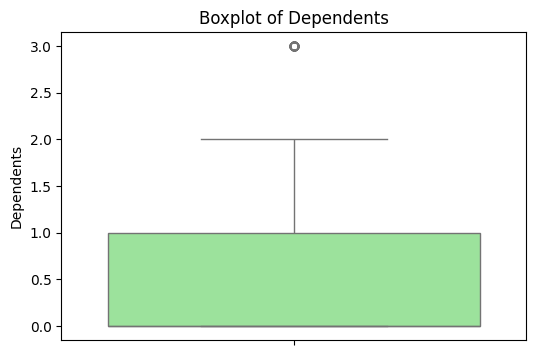

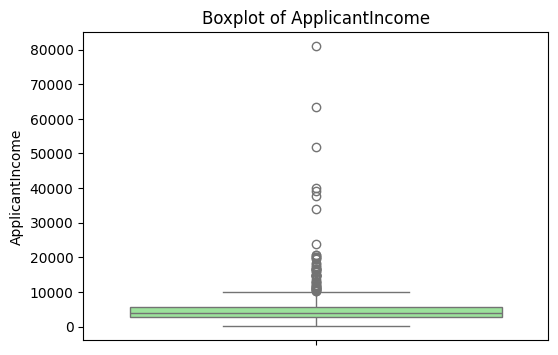

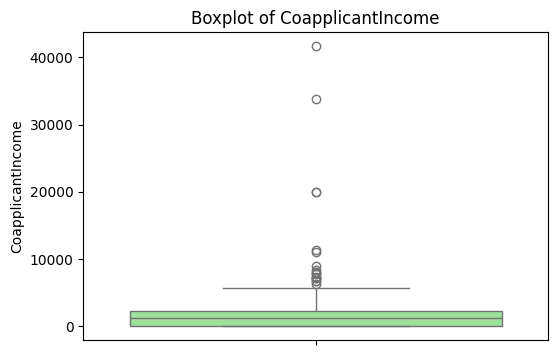

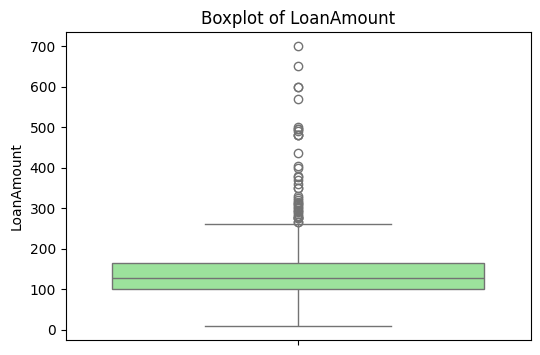

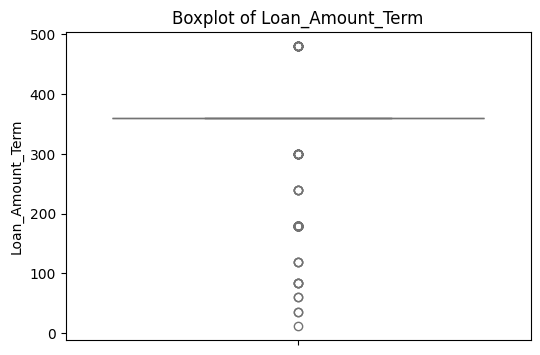

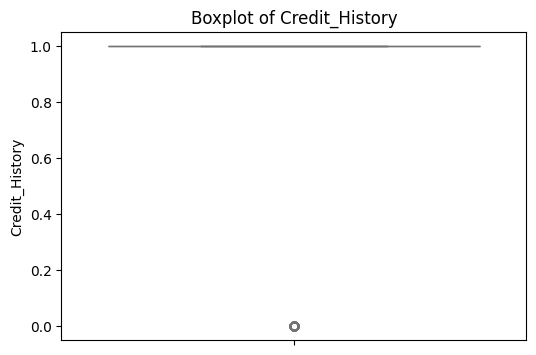

In [392]:
# Plotting box plots for Numerical columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### --> In the above box plots, outliers are the points that lie beyond the whiskers. where the whiskers extend to 1.5 x IQR (Interquartile Range) from Q1 and Q3.

In [393]:
# Outlier detection using IQR

for col in num_cols:
  Q1 = ml_df[col].quantile(0.25)         # calculate IQR
  Q3 = ml_df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_whisker = Q1 - 1.5 * IQR        # define limits or whiskers
  upper_whisker = Q3 + 1.5 * IQR

  outlier_values = ml_df.loc[(ml_df[col] < lower_whisker) | (ml_df[col] > upper_whisker),col] # calculate the values out of limits
  print(f"Outliers in {col}: {outlier_values.values}")          # print outliers in all num cols
  print("\n")


Outliers in Dependents: [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3.]


Outliers in ApplicantIncome: [12841. 12500. 11500. 10750. 13650. 11417. 14583. 10408. 23803. 10513.
 20166. 14999. 11757. 14866. 39999. 51763. 33846. 39147. 12000. 11000.
 16250. 14683. 11146. 14583. 20667. 20233. 15000. 63337. 19730. 15759.
 81000. 14880. 12876. 10416. 37719. 16692. 16525. 16667. 10833. 18333.
 17263. 20833. 13262. 17500. 11250. 18165. 19484. 16666. 16120. 12000.]


Outliers in CoapplicantIncome: [10968.  8106.  7210.  8980.  7750. 11300.  7250.  7101.  6250.  7873.
 20000. 20000.  8333.  6667.  6666.  7166. 33837. 41667.]


Outliers in LoanAmount: [267. 349. 315. 320. 286. 312. 265. 370. 650. 290. 600. 275. 700. 495.
 280. 279. 304. 330. 436. 480. 300. 376. 490. 308. 570. 380. 296. 275.
 360. 405. 500. 480. 311. 480. 400. 324. 600. 275. 292. 350. 496.]


Outliers in Loan_Amount_Term: [12

###Checking for Skewness

Skewness measures the asymmetry of a data distribution.

It is important because high skewness can violate model assumptions and affect prediction accuracy,

if mean > median means positvely skewed

In [394]:
# checking for skewness
ml_df[num_cols].skew()

,0
Dependents,1.015551
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.743053
Loan_Amount_Term,-2.402112
Credit_History,-2.021971


## Step 5: Outlier Handling

Outlier capping is a technique where extreme values (outliers) are replaced with a fixed boundary value, instead of being removed.
Usually done using IQR method,

1. Calculate the first quartile(The value below which 25% of the data lies) and the third quartile(The value below which 75% of the data lie) and then IQR which is the difference.

2. Define lower and upper limits

3. Replace values lower that lower limit with lower limit and higher than upper limit with upper limit.







In [395]:
 # we have defined a function for capping outiers

def cap_outliers_numeric(df, numeric_cols):
    """
    Caps outliers in all numeric columns using 1.5*IQR method.
    Modifies the DataFrame in-place to avoid SettingWithCopyWarning.
    """
    for col in numeric_cols:                   #calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR          #define limits
        upper_limit = Q3 + 1.5 * IQR

        # Use .loc to modify safely
        df.loc[:, col] = df[col].clip(lower_limit, upper_limit)   #Replace values


In [396]:
# calling the above defined function

cap_outliers_numeric(ml_df, num_cols)

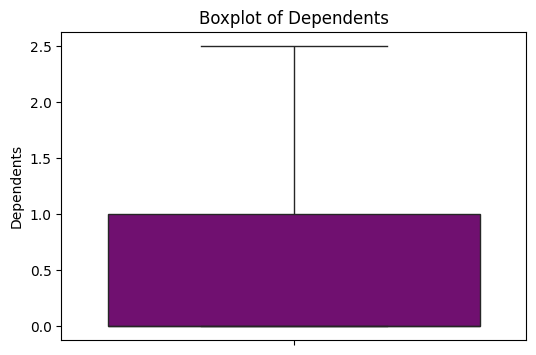

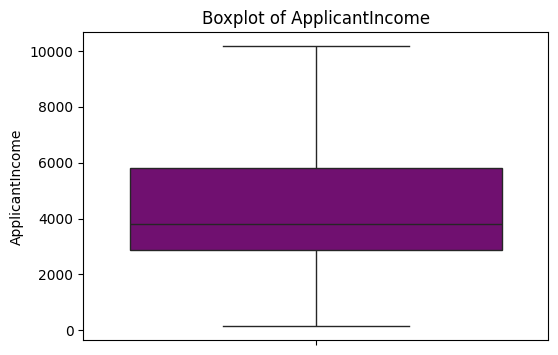

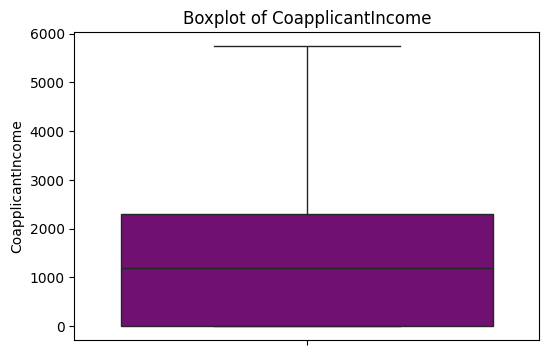

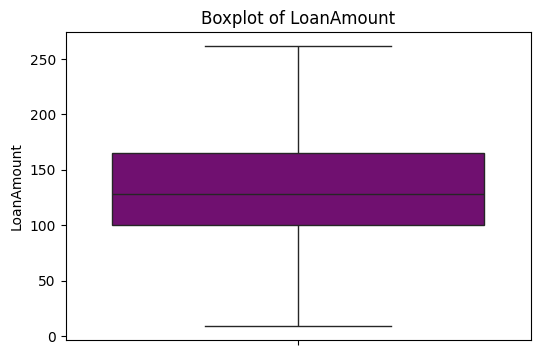

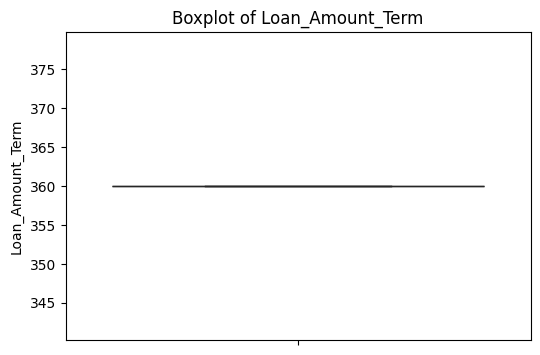

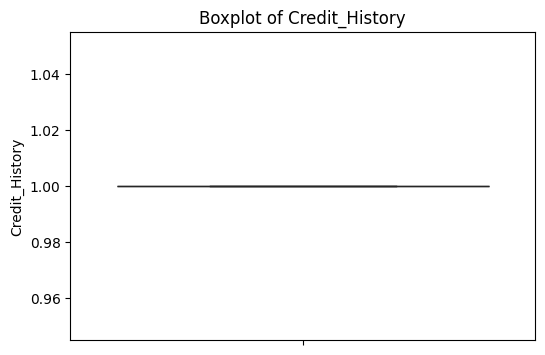

In [397]:
# verify if outliers are handled using box plots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='purple')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### --> Outliers are handled, as points no longer lie beyond the whiskers.

###Checking for skewness after outlier handling

In [398]:
ml_df[num_cols].skew()

,0
Dependents,0.822345
ApplicantIncome,1.039846
CoapplicantIncome,1.012763
LoanAmount,0.683693
Loan_Amount_Term,0.000000
Credit_History,0.000000


Few columns are positively skewed, so for we will take square root transformation of those columns because it reduces right skewness by compressing large values.

In [399]:
# Taking square root Transformation
import numpy as np                              # importing numpy
skew_vals = ml_df[num_cols].skew()              # transform is applied to columns with skew > 0.5
skew_cols = skew_vals[skew_vals > 0.5].index
for col in ml_df[skew_cols]:
  ml_df[col] = np.sqrt(ml_df[col])   #sqrt transform


In [400]:
#Checking skewness after transform
ml_df[num_cols].skew()

,0
Dependents,0.512469
ApplicantIncome,0.540741
CoapplicantIncome,0.192830
LoanAmount,0.064140
Loan_Amount_Term,0.000000
Credit_History,0.000000


## Step 6: Encoding

Encoding is the process of converting categorical data into numerical values so that machine learning models can process it.

It helps models to understand and learn from categorical features, improving prediction accuracy.



In [401]:
# we encode categorical columns
ml_df[cat_cols]

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


There are different types of encoding
1. Label Encoding - Assigns a unique number to each category. used for small features.
2. Ordinal Encoding -Maps categories to numbers with meaningful order. done for features with order.
3. One-Hot Encoding - Creates binary columns for each category. used for nominal features
4. Target Encoding- Converts categories to binary or numeric values based on target statistics.Used for high-cardinality features.


Here we will use One-Hot encoding for all features as they are nominal, also as label encoding is not usually preferred.


In [402]:
# One-Hot Encoding
ml_df = pd.get_dummies(
    ml_df,
    columns=cat_cols,
    drop_first=True, dtype=int       #drop first removes  first column alphabetically ,  i.e Gender_Female is dropped
)

In [403]:
ml_df.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,76.478755,0.000000,11.313708,360.0,1.0,1,0,0,0,0,1,1
1,1.0,67.697858,38.832976,11.313708,360.0,1.0,1,1,0,0,0,0,0
2,0.0,54.772256,0.000000,8.124038,360.0,1.0,1,1,0,1,0,1,1
3,0.0,50.823223,48.559242,10.954451,360.0,1.0,1,1,1,0,0,1,1
4,0.0,77.459667,0.000000,11.874342,360.0,1.0,1,0,0,0,0,1,1


#### --> All categorical columns are encoded.

# Step 7: Scaling
Scaling is the process of resizing numeric features to a standard range or distribution.
Features with different scales can bias machine learning models.

Without scaling, models may give importance to larger values irrespective of units.
After scaling all  features are roughly on the same scale.

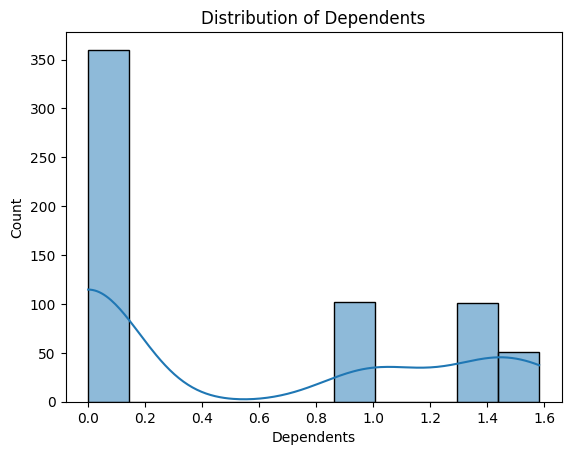

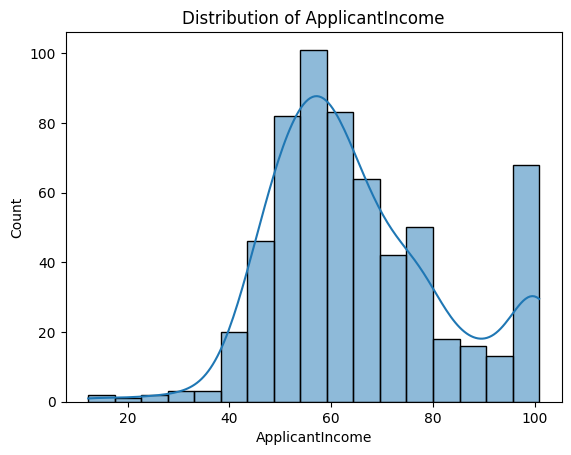

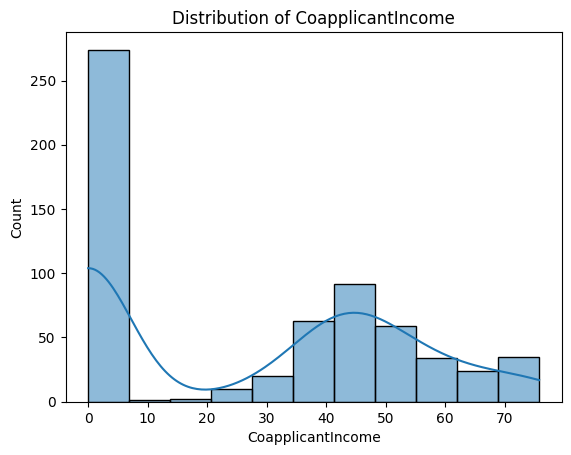

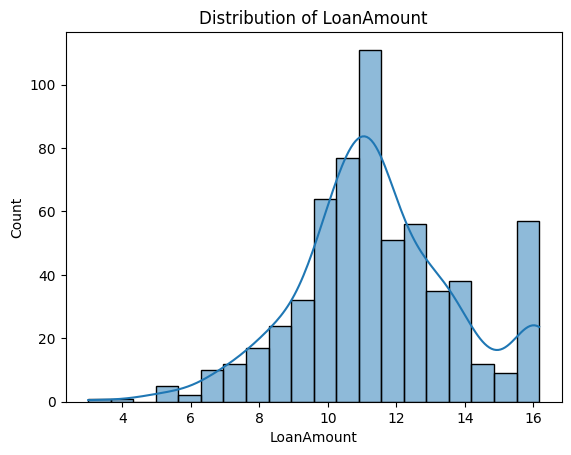

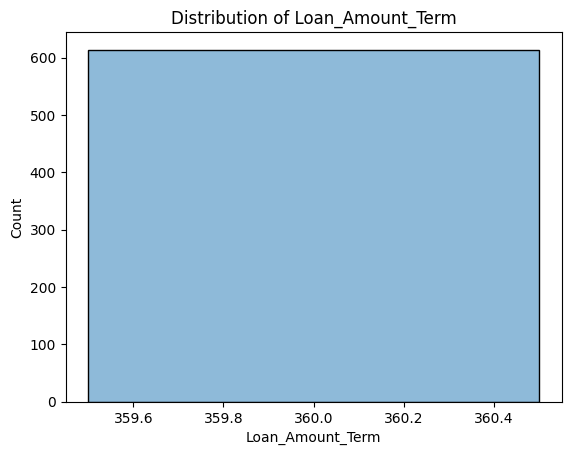

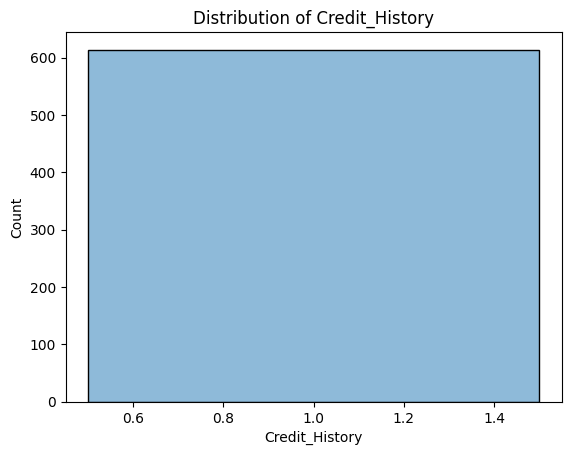

In [404]:
# Visualizing using histogram
for col in num_cols:
    sns.histplot(ml_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [405]:
# perform scaling using function StandardScaler from library sklearn and module preprocessing
from sklearn.preprocessing import StandardScaler

scale_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
scaler = StandardScaler()

ml_df[scale_cols] = scaler.fit_transform(ml_df[scale_cols])

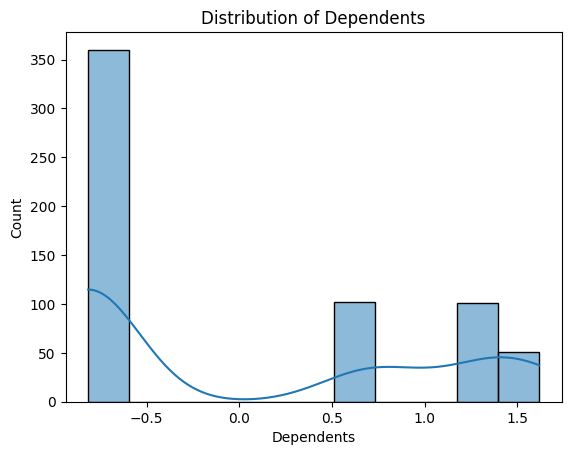

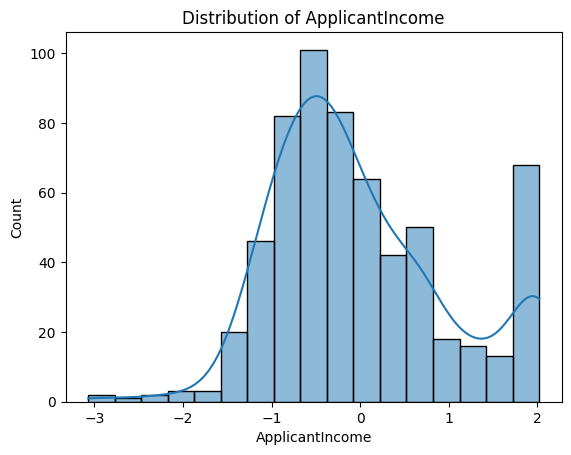

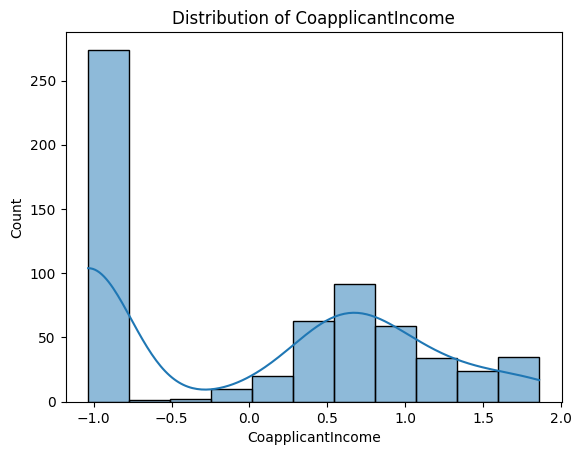

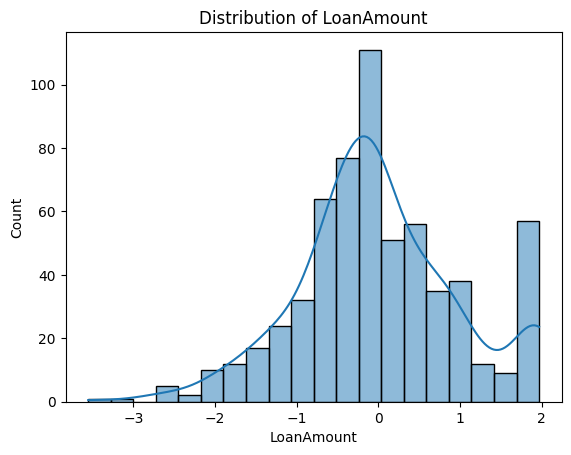

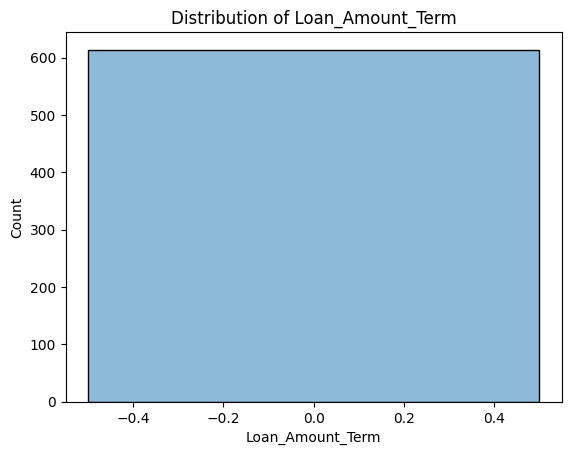

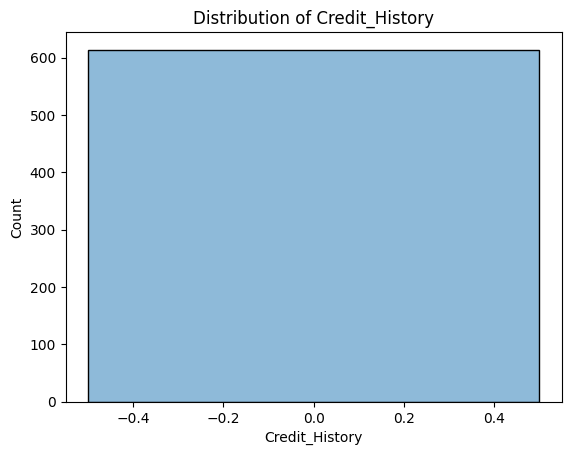

In [406]:
# verifying scaling
for col in num_cols:
    sns.histplot(ml_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

The values are scaled as more values are centered around 0.

In [407]:
# final dataset which will be used for training model
ml_df.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,-0.816219,0.620360,-1.035802,-0.067692,0.0,0.0,1,0,0,0,0,1,1
1,0.723563,0.115773,0.448047,-0.067692,0.0,0.0,1,1,0,0,0,0,0
2,-0.816219,-0.626986,-1.035802,-1.405235,0.0,0.0,1,1,0,1,0,1,1
3,-0.816219,-0.853913,0.819698,-0.218342,0.0,0.0,1,1,1,0,0,1,1
4,-0.816219,0.676727,-1.035802,0.167402,0.0,0.0,1,0,0,0,0,1,1
5,1.361361,0.454951,1.439378,1.969129,0.0,0.0,1,1,0,1,0,1,1
6,-0.816219,-0.998843,0.451978,-0.724756,0.0,0.0,1,1,1,0,0,1,1
7,1.618389,-0.608157,0.876279,0.459034,0.0,0.0,1,1,0,0,1,0,0
8,1.361361,-0.137350,0.456877,0.623278,0.0,0.0,1,1,0,0,0,1,1
9,0.723563,2.020983,1.859962,1.969129,0.0,0.0,1,1,0,0,1,0,0


# The dataset is preprocessed by performing the following:
1. Missing value handling
2. outlier detection and handling
3. Encoding
4. Scaling